In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
%matplotlib inline
# %matplotlib qt
# %matplotlib osx
import numpy as np
import cmocean
import itertools
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy import interpolate
import statsmodels.api as sm
from adjustText import adjust_text

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())

# sns.set_palette('colorblind')


'2018-10-19 14:22:35.291102'

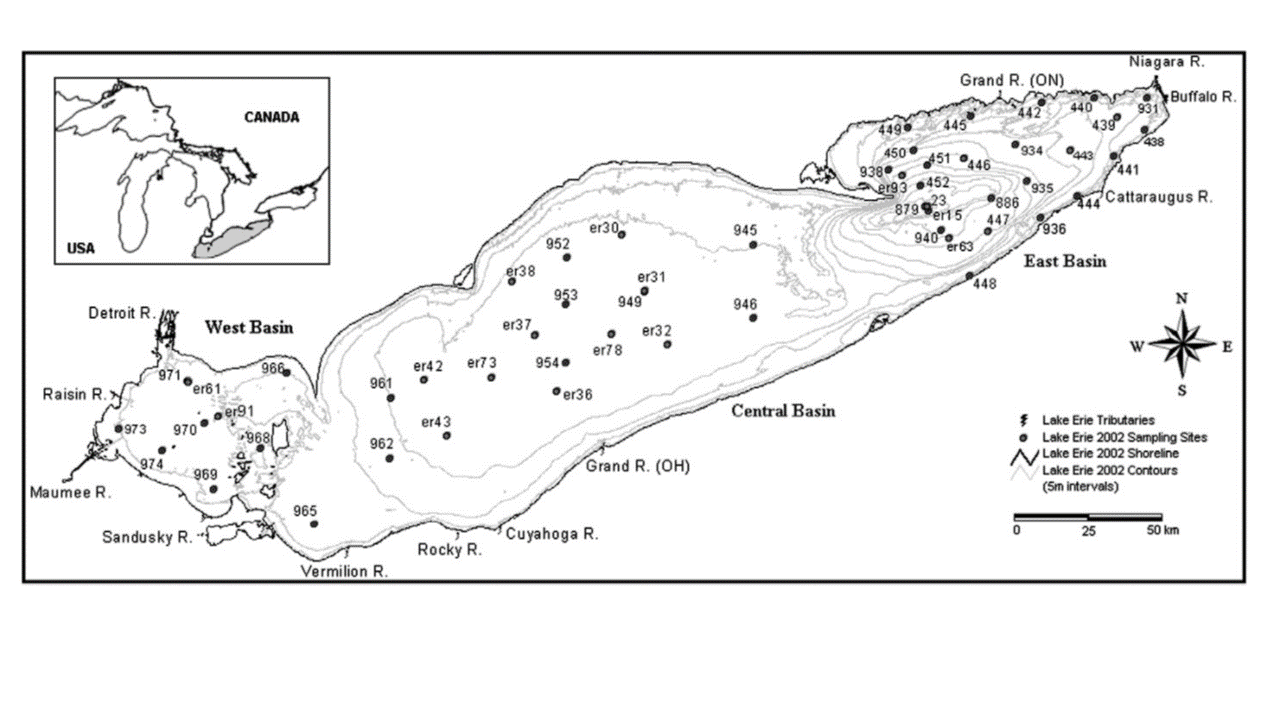

In [2]:
from IPython.display import Image
Image(filename='/Users/imarkelo/git/Great-Lakes-Data/measurements/ECCC/Lake_Erie_map_with_stations-1.png') 

In [3]:
df = pd.read_excel('../../measurements/ECCC/LakeErie_Markelov_Dove26May2017.xlsx', sheetname='Data')
ECCCmeas = df[df['DEPTH_TO']==0]
ECCCmeas['YEAR']=pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).year
ECCCmeas['MONTH']=pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).month
ECCCmeas = ECCCmeas[ECCCmeas['YEAR']>1999]
# Cl = Cl[Cl.QC_TYPE=='routine field sample']
# Cl = Cl[~Cl.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
# Cl = Cl[Cl.YEAR>2002]
# Cl.loc[:,'SAMPLE_DEPTH_M'] *= -1

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
eastern_basin_a = [448, 940, 879, 938, 450, 449, 451, 452, 447, 936,886,446, 445,934,935,444,441,443,442,440,439,438,931]
central_basin_a = [965, 962, 961, 954, 953, 952, 949, 945, 946]
western_basin_a = [971, 973, 974, 970, 966, 968, 969]

In [5]:
eastern_basin_b = [937,939,941,942,887,1237,1236,933,727,932, 486, 67]
central_basin_b = [493,492,491,338,885,311,339,341,963,964,960,859,918,919,957,958,1326,880,920,956,955,899,915,889,888,916,951,950,896,897,898,1053,948,947,1223,1222,1221,1220,1219,1218,1217,1216,1215,1214,1213,1212,1211,1210,1209,1292,943,944,947,205,1048]
western_basin_b = [882, 733, 881, 1156, 972, 343, 357, 358, 344, 337, 967, 494, 495, 496]


In [6]:
western_basin_f = list(filter(lambda x: x in  western_basin_a + western_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))
central_basin_f = list(filter(lambda x: x in  central_basin_a + central_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))
eastern_basin_f = list(filter(lambda x: x in  eastern_basin_a + eastern_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))


In [7]:
western_basin_f[:6]

[970, 881, 969, 973, 967, 968]

In [8]:
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
       return 'Spring'
    if x in summer:
       return 'Summer'
    if x in fall:
       return 'Fall'
    else:
       return 'Winter'

In [33]:
ECCCmeas['SEASON'] = pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).dayofyear.map(season)

In [34]:
ECCCmeas.loc[:,'DEPTH_FROM'] *= -1

In [35]:
ECCCmeas = ECCCmeas[ECCCmeas['DEPTH_FROM']>-900]

In [36]:
ECCCmeas['VALUE'] = pd.to_numeric(ECCCmeas['VALUE'], errors='coerce')
ECCCmeas['PSN'] = pd.to_numeric(ECCCmeas['PSN'], errors='coerce')
ECCCmeas['LATITUDE_DD'] = pd.to_numeric(ECCCmeas['LATITUDE_DD'], errors='coerce')
ECCCmeas['LONGITUDE_DD'] = pd.to_numeric(ECCCmeas['LONGITUDE_DD'], errors='coerce')

In [37]:
stations = eastern_basin_f + central_basin_f + western_basin_f
years = range(2003,2018)
seasons = ['Spring', 'Summer']

In [38]:
ECCCmeas.ABBREV.unique()

array(['PH', 'D ORG C', 'POC', 'D 02 W', 'SAT 02', 'TP', 'SR P', 'TF P',
       'N TP', 'NH3', 'NO3NO2 F', 'S04 F', 'CL F', 'CA FA', 'MG F',
       'K-FAAS', 'NA-FAAS', 'D OXY P', 'CAU', 'CAC', 'AL/T-OES',
       'FE/T-OES', 'SO4', 'CL-F', 'AL/T-MS', 'FE/T-MS', 'D.I.C', 'F-F',
       'SO4-F', 'SRP-P-F', 'TP-P', 'TP-P-UF', 'TP-P-F', 'CA-F', 'K-F',
       'MG-F', 'NA-F'], dtype=object)

In [39]:
ECCCmeas.FULL_NAME.unique()

array(['PH', 'CARBON,DISSOLVED ORGANIC', 'CARBON,PARTICULATE ORGANIC',
       'OXYGEN,CONCENTRATION DISSOLVED', 'OXYGEN,% SAT. DISSOLVED',
       'PHOSPHOROUS,TOTAL', 'PHOSPHOROUS,SOLUBLE REACTIVE,FILTERED',
       'PHOSPHORUS,TOTAL FILTERED', 'NITROGEN,TOTAL PARTICULATE',
       'AMMONIA NITROGEN,SOLUBLE', 'NITRATE+NITRITE NITROGEN,FILTERED',
       'SULPHATE,FILTERED.', 'CHLORIDE,FILTERED',
       'CALCIUM,FILTERED ATOMIC ABS.', 'MAGNESIUM,FILTERED',
       'POTASSIUM-F.,ATOMIC ABSORPTION', 'SODIUM-F.,ATOMIC ABSORPTION',
       'DISSOLVED OXYGEN, PROFILER WQP', 'CHLOROPHYL A, UNCORRECTED',
       'CHLOROPHYLL A, CORRECTED PHAEOPHYTIN',
       'ALUMINUM                      ', 'IRON                          ',
       'SULPHATE', 'CHLORIDE', 'ALUMINUM', 'IRON',
       'DISSOLVED INORGANIC CARBON', 'FLUORIDE',
       'AMMONIA NITROGEN, SOLUBLE', 'NITRATE+NITRITE NITROGEN, FILTERED',
       'SOLUBLE REACTIVE PHOSPHOROUS', 'PHOSPHORUS, TOTAL, PARTICULATE',
       'TOTAL PHOSPHOROUS', 'TOT

In [40]:
# ECCCmeas = ECCCmeas[ECCCmeas['PSN'].isin(eastern_basin + central_basin + western_basin)]
ECCCmeas = ECCCmeas[ECCCmeas['SEASON'].isin(seasons)]
# ECCCmeas['VALUE'] = pd.to_numeric(ECCCmeas['VALUE'], errors='coerce')

In [41]:
ECCCmeas[~ECCCmeas['PSN'].isin(eastern_basin_f + central_basin_f + western_basin_f)].PSN.unique()

array([ 959,  980, 1163, 1238, 1239, 1240, 1257, 1207, 1262])

In [42]:
PSNs_loc = ECCCmeas.groupby(['PSN']).mean()[['LATITUDE_DD', 'LONGITUDE_DD']].reset_index()


In [43]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')
topo = -nc.variables['z'][:] #[::10,::10]
x = nc.variables['x'][:] #[::10]
y = nc.variables['y'][:] #[::10]
lon, lat = np.meshgrid(x, y)

In [44]:
levels1 = np.linspace(0,70,14*2+1)

In [45]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')

In [46]:
GLENDA_stations = Cl.groupby(['STATION_ID']).mean()[['LATITUDE', 'LONGITUDE']].reset_index()

In [47]:
GLENDA_stations['LATITUDE'] = pd.to_numeric(GLENDA_stations['LATITUDE'], errors='coerce')
GLENDA_stations['LONGITUDE'] = pd.to_numeric(GLENDA_stations['LONGITUDE'], errors='coerce')

In [48]:
glenda_eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
glenda_central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73', 'ER36', 'ER32'] #, 'ER43','ER31']
glenda_western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']

In [49]:
ECCCmeas.ABBREV.unique()

array(['PH', 'D ORG C', 'POC', 'D 02 W', 'SAT 02', 'TP', 'SR P', 'TF P',
       'N TP', 'NH3', 'NO3NO2 F', 'S04 F', 'CL F', 'CA FA', 'MG F',
       'K-FAAS', 'NA-FAAS', 'D OXY P', 'CAU', 'CAC', 'AL/T-OES',
       'FE/T-OES', 'SO4', 'CL-F', 'AL/T-MS', 'FE/T-MS', 'D.I.C', 'F-F',
       'SO4-F', 'SRP-P-F', 'TP-P', 'TP-P-UF', 'TP-P-F', 'CA-F', 'K-F',
       'MG-F', 'NA-F'], dtype=object)

In [50]:
combined_elements = [['PH'], ['CAU', 'CAC'], ['D.I.C'], ['D ORG C'], ['POC'], ['D 02 W', 'D OXY P'],['TP-P-UF', 'TP'], ['TP-P-F', 'TF P'], ['SRP-P-F', 'SR P'], 
 ['N TP'], ['NH3'], ['NO3NO2 F'], ['SO4-F', 'S04 F'], ['CL-F', 'CL F'], ['CA-F', 'CA-F/ICP', 'CA FA'], 
 ['MG-F', 'MG F', 'MG-F'], ['K FS', 'K-FAAS','K-FICP','K-F'], ['NA FS', 'NA-FAAS', 'NA-FICP', 'NA-F'],
 ['AL/T-OES', 'AL/T-MS'], ['FE/T-OES', 'FE/T-MS'], ['F-F'], ['SAT 02']]

 
 

In [80]:
def basin(x):
    if int(x) in np.array([western_basin_a + western_basin_b]).flatten():
       return 'Western'
    if int(x) in np.array([central_basin_a + central_basin_b]).flatten():
       return 'Central'
    if int(x) in np.array([eastern_basin_a + eastern_basin_b]).flatten():
       return 'Eastern'
    else:
       return 'Unknown'

In [81]:
ECCCmeas['BASIN'] =ECCCmeas['PSN'].map(basin)

In [119]:
ECCCmeas_grouped = ECCCmeas.groupby(['BASIN','YEAR','SEASON', 'FULL_NAME', 'ABBREV', 'UNITS']).mean().reset_index()

In [120]:
data = ECCCmeas_grouped[ECCCmeas_grouped.ABBREV.isin(combined_elements[1])]

In [121]:
data

,BASIN,YEAR,SEASON,FULL_NAME,ABBREV,UNITS,CRUISE_PLAN,CSN,LATITUDE_DD,LONGITUDE_DD,PSN,SOUNDING,CODE,DEPTH_FROM,DEPTH_TO,DETECTION,SEQ_NO,VALUE,MONTH
19,Central,2000,Summer,"CHLOROPHYL A, UNCORRECTED",CAU,UG/L,2.000010e+08,45.625000,41.718337,-82.559750,338.625000,10.112500,610.0,4.250000,0.0,0.1,0.000000,3.562500,8.000000
20,Central,2000,Summer,"CHLOROPHYLL A, CORRECTED PHAEOPHYTIN",CAC,UG/L,2.000010e+08,45.625000,41.718337,-82.559750,338.625000,10.112500,611.0,4.250000,0.0,0.1,0.000000,3.087500,8.000000
129,Central,2007,Spring,"CHLOROPHYL A, UNCORRECTED",CAU,UG/L,2.007010e+08,34.333333,41.951433,-81.524578,937.000000,17.444444,610.0,1.000000,0.0,0.1,0.000000,3.644444,4.000000
130,Central,2007,Spring,"CHLOROPHYLL A, CORRECTED PHAEOPHYTIN",CAC,UG/L,2.007010e+08,34.333333,41.951433,-81.524578,937.000000,17.444444,611.0,1.000000,0.0,0.1,0.000000,2.511111,4.000000
179,Central,2010,Summer,"CHLOROPHYL A, UNCORRECTED",CAU,UG/L,2.010010e+08,28.888889,41.855311,-81.654700,869.888889,14.311111,610.0,1.000000,0.0,0.1,0.000000,5.222222,7.000000
180,Central,2010,Summer,"CHLOROPHYLL A, CORRECTED PHAEOPHYTIN",CAC,UG/L,2.010010e+08,28.888889,41.855311,-81.654700,869.888889,14.311111,611.0,1.000000,0.0,0.1,0.000000,3.833333,7.000000
200,Central,2012,Spring,"CHLOROPHYL A, UNCORRECTED",CAU,UG/L,2.012010e+08,17.291667,41.976992,-81.632375,962.750000,18.591667,610.0,7.583333,0.0,0.1,0.000000,3.216667,5.000000
201,Central,2012,Spring,"CHLOROPHYLL A, CORRECTED PHAEOPHYTIN",CAC,UG/L,2.012010e+08,17.291667,41.976992,-81.632375,962.750000,18.591667,611.0,7.583333,0.0,0.1,0.000000,2.545833,5.000000
225,Central,2012,Summer,"CHLOROPHYL A, UNCORRECTED",CAU,UG/L,2.012010e+08,20.100000,42.003290,-81.509360,927.200000,19.415000,610.0,11.250000,0.0,0.1,0.000000,3.750000,7.000000
226,Central,2012,Summer,"CHLOROPHYLL A, CORRECTED PHAEOPHYTIN",CAC,UG/L,2.012010e+08,20.736842,42.006868,-81.501737,929.684211,19.194737,611.0,10.710526,0.0,0.1,0.000000,3.563158,7.000000


['AL/T-OES', 'AL/T-MS']
['FE/T-OES', 'FE/T-MS']


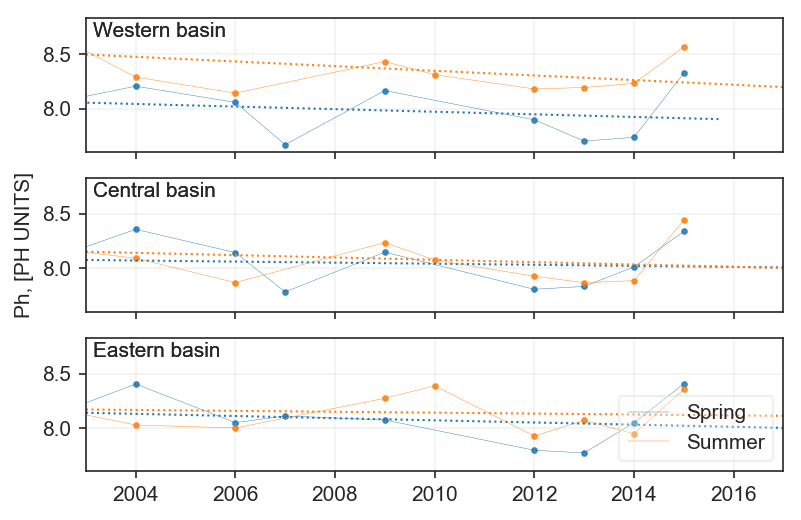

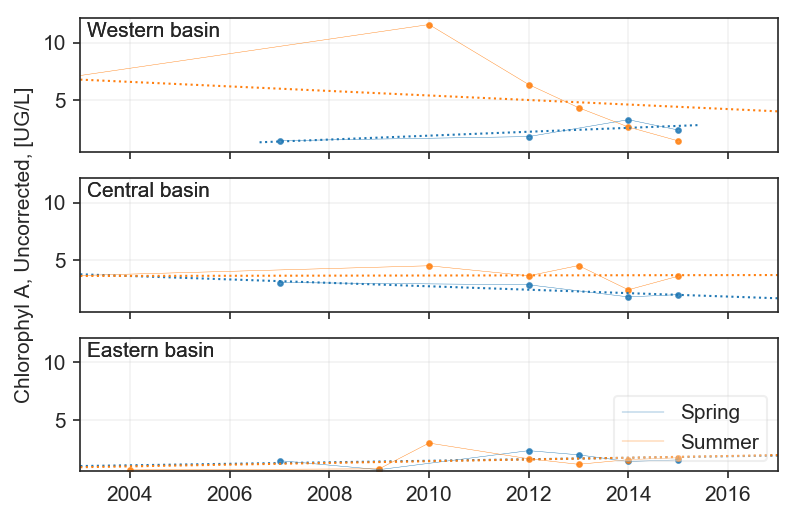

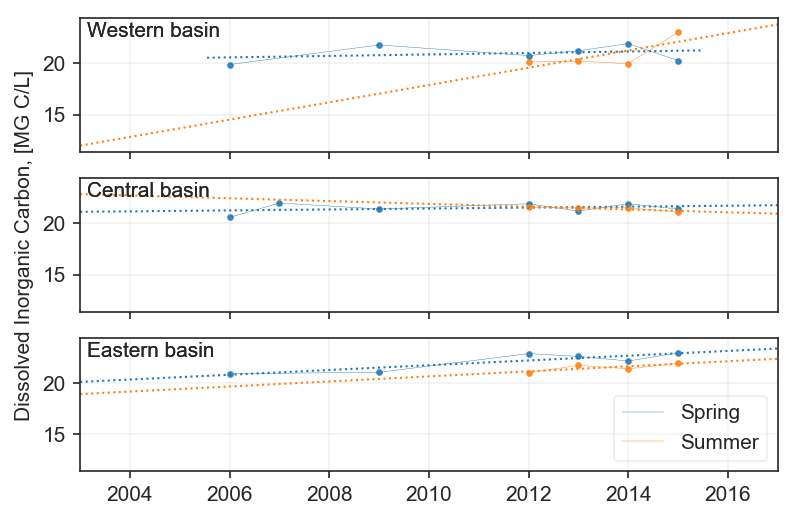

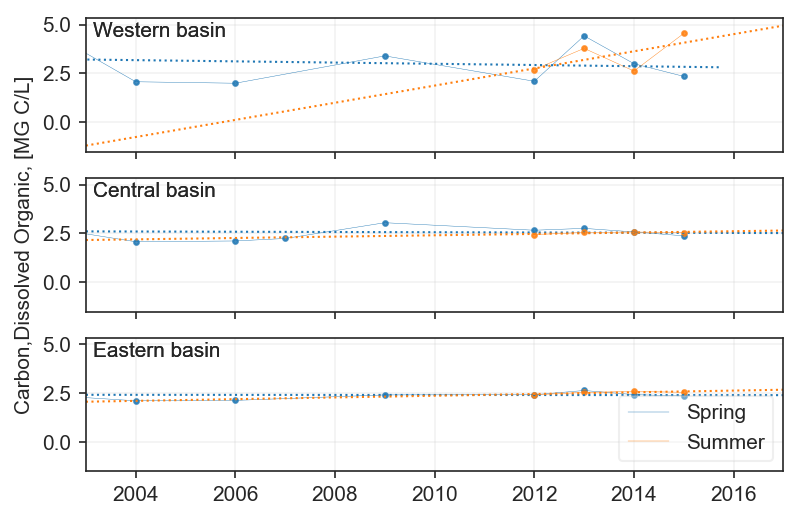

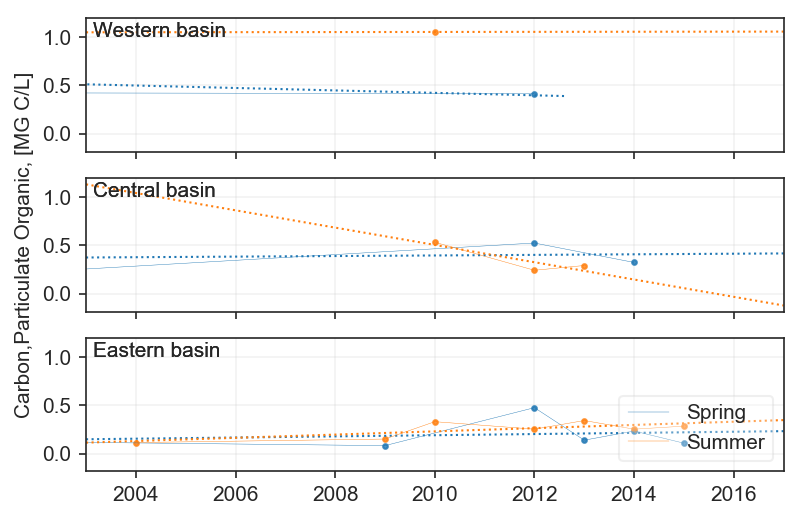

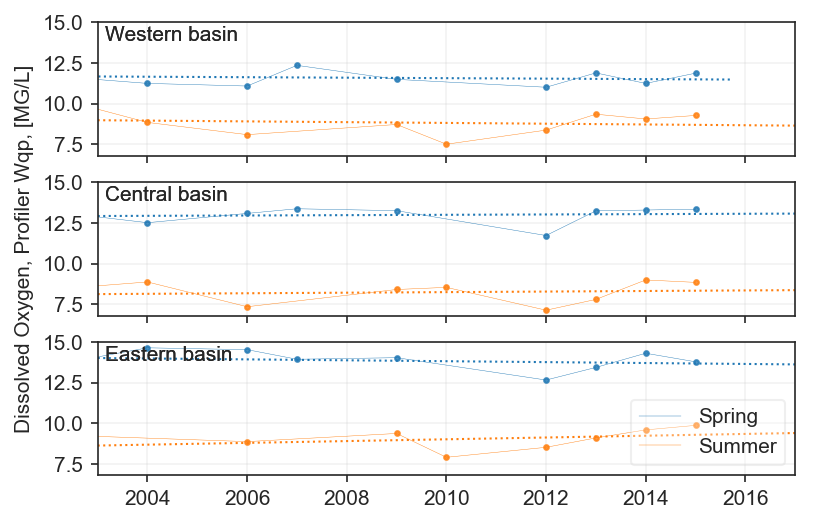

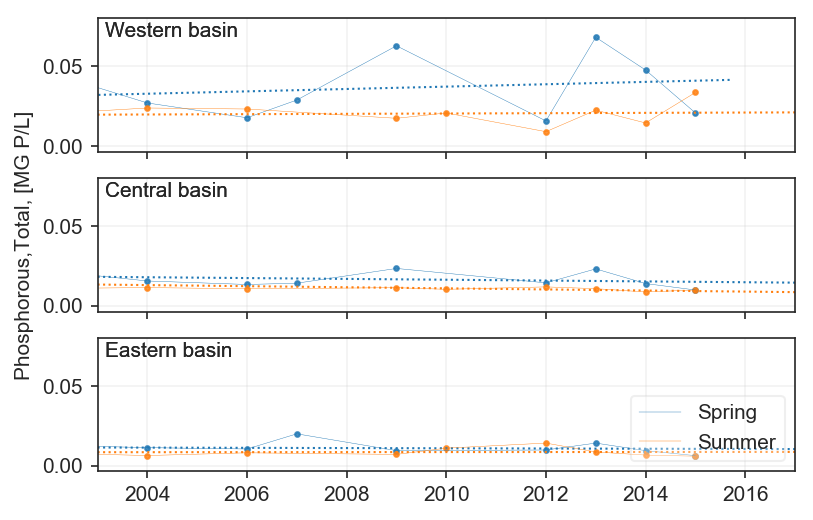

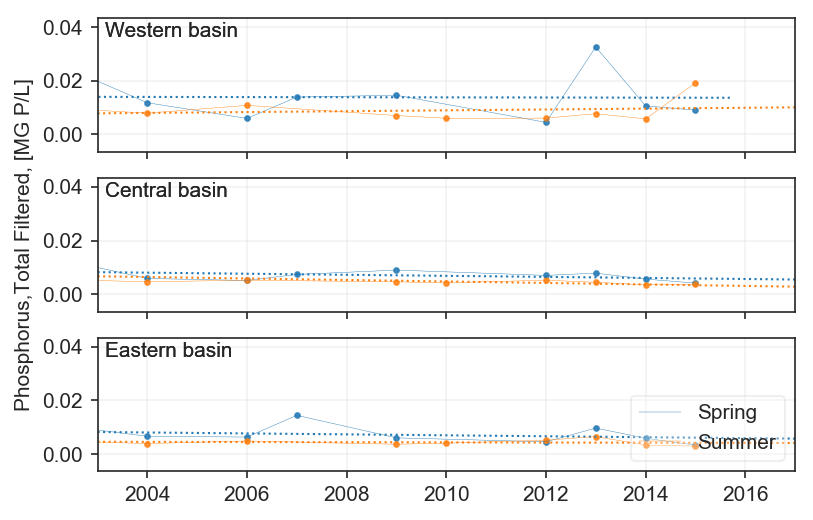

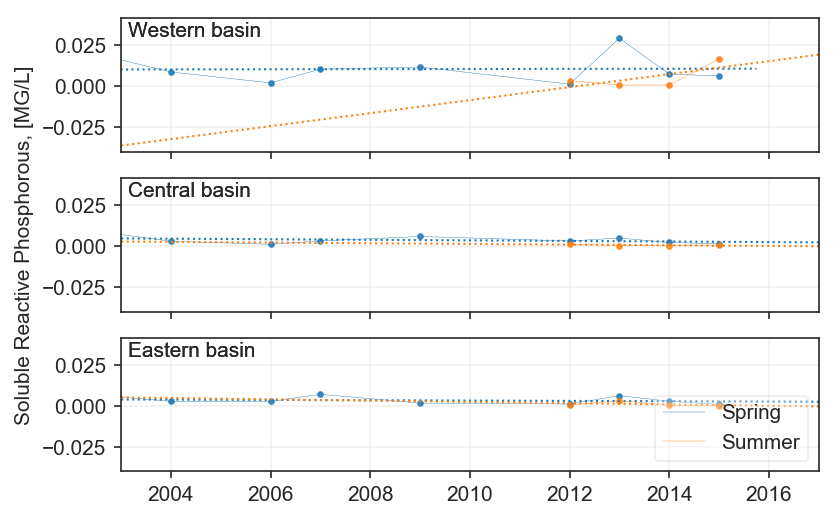

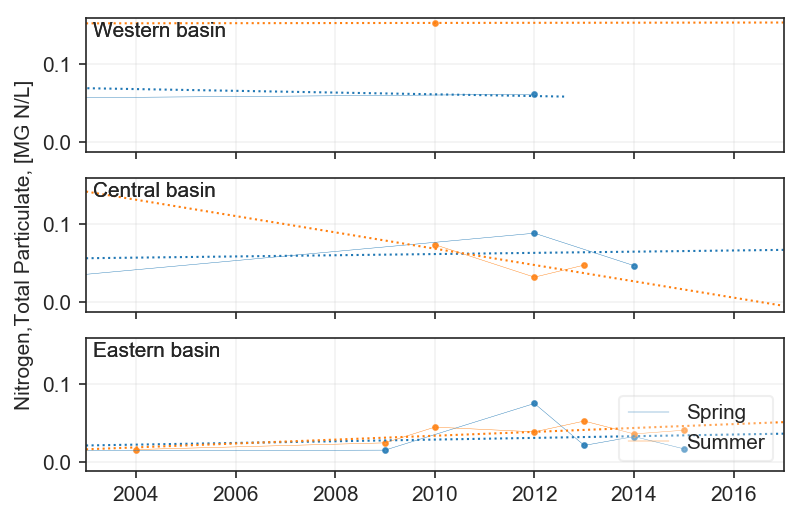

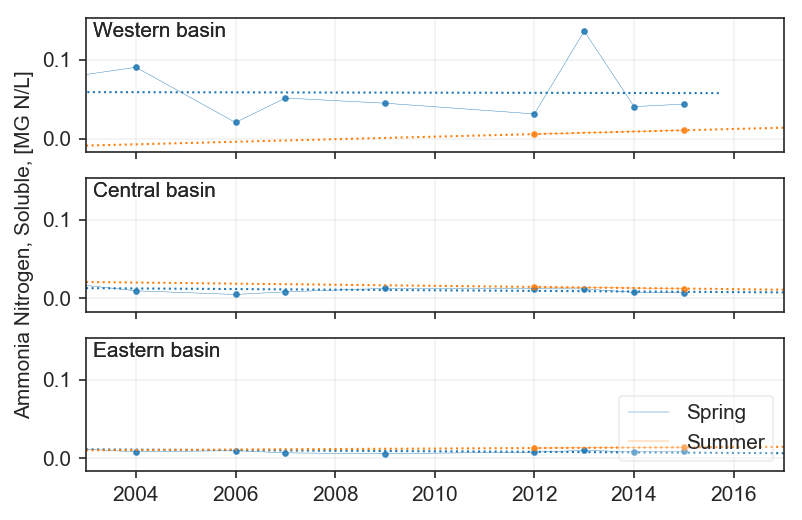

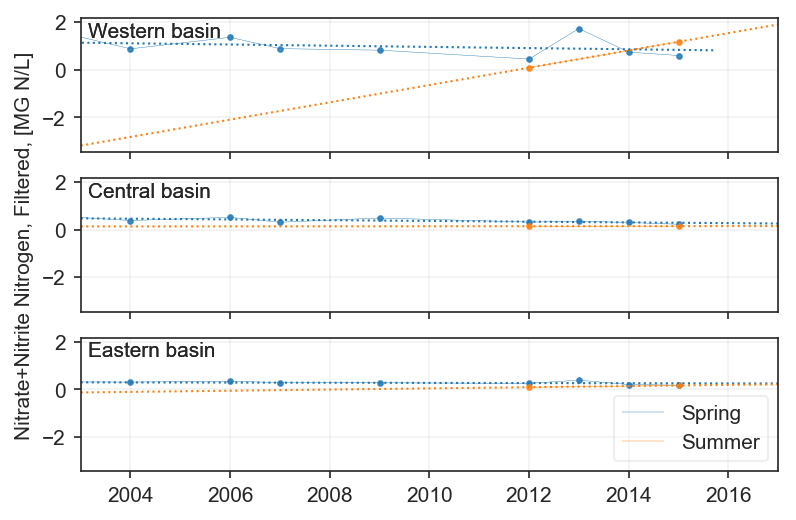

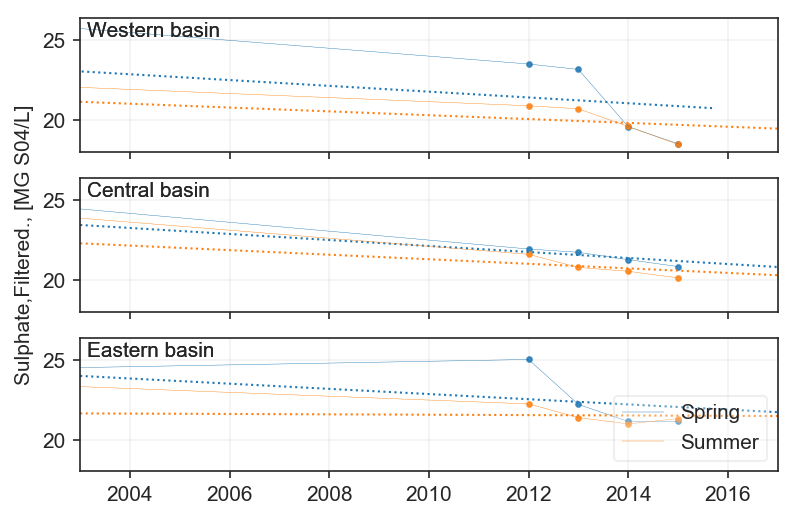

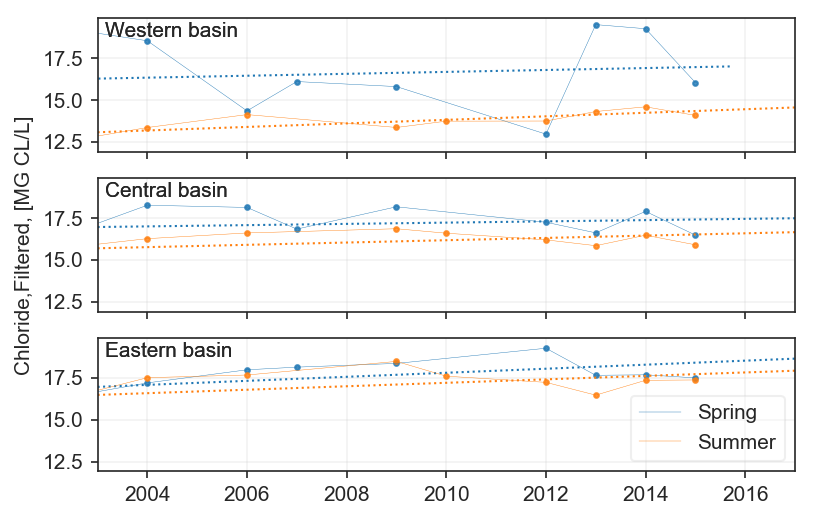

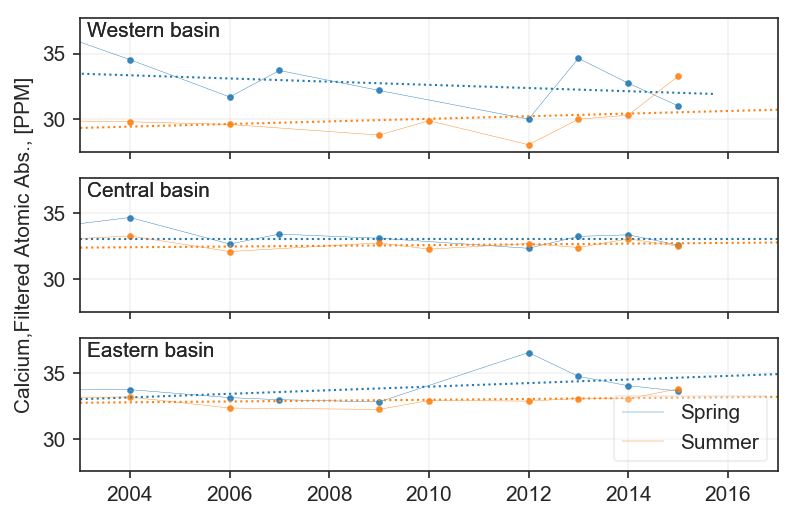

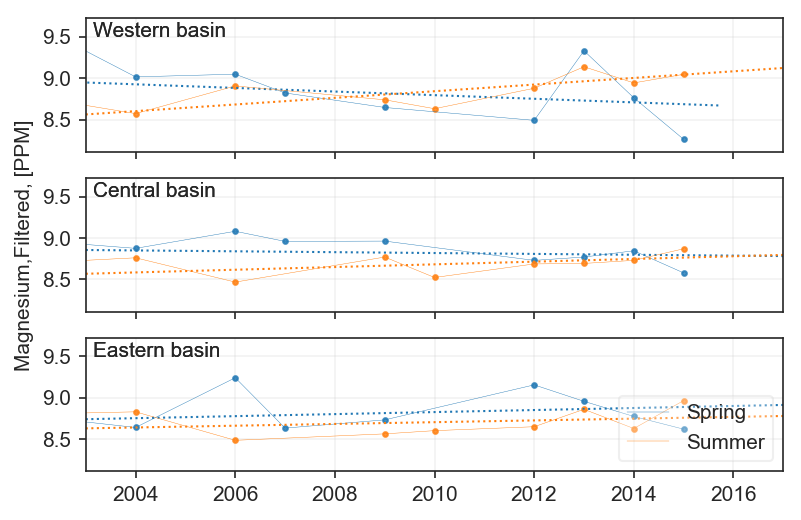

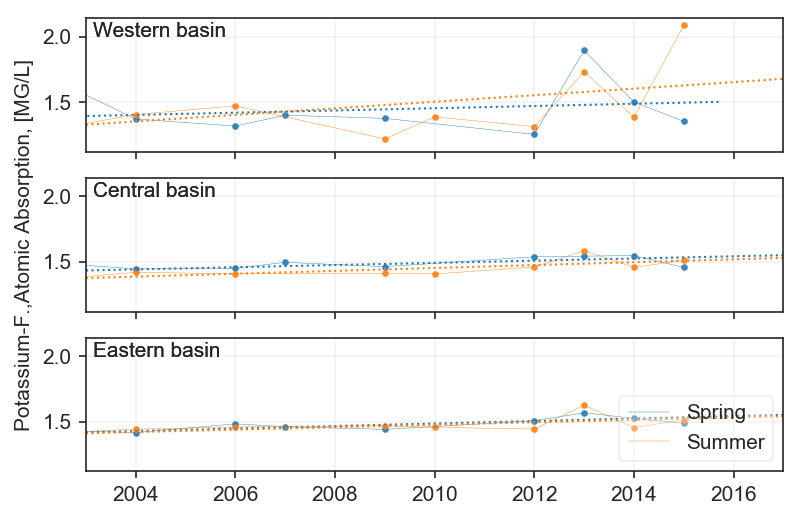

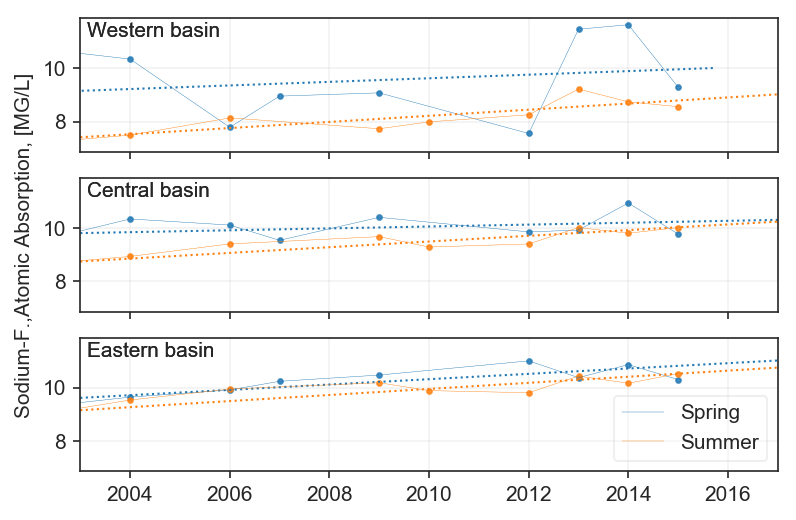

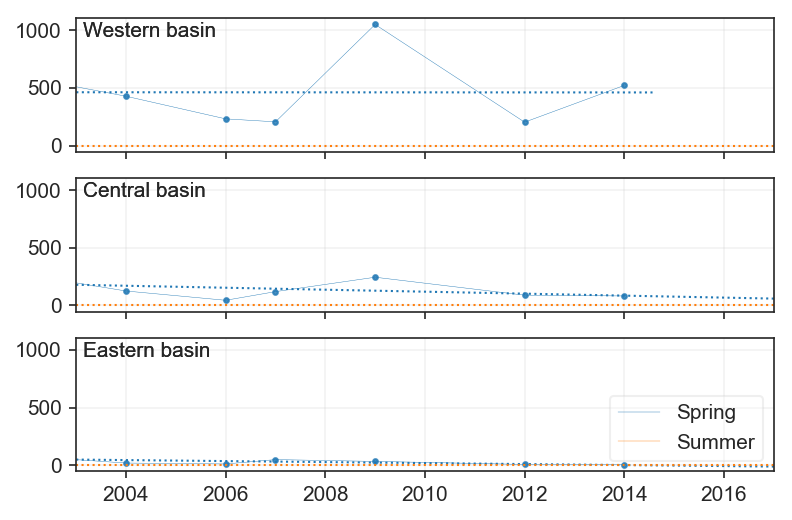

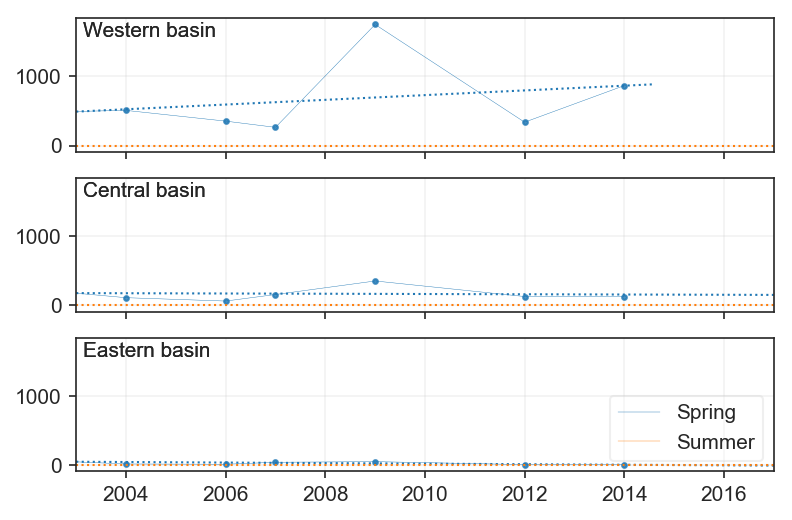

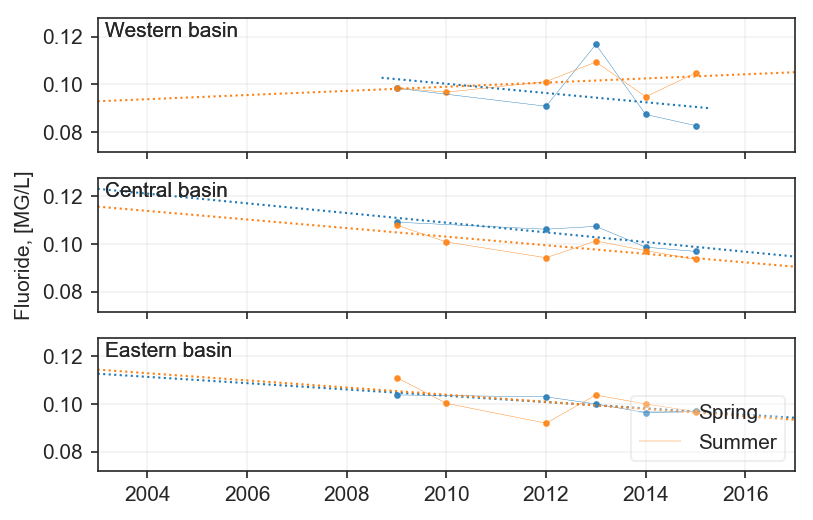

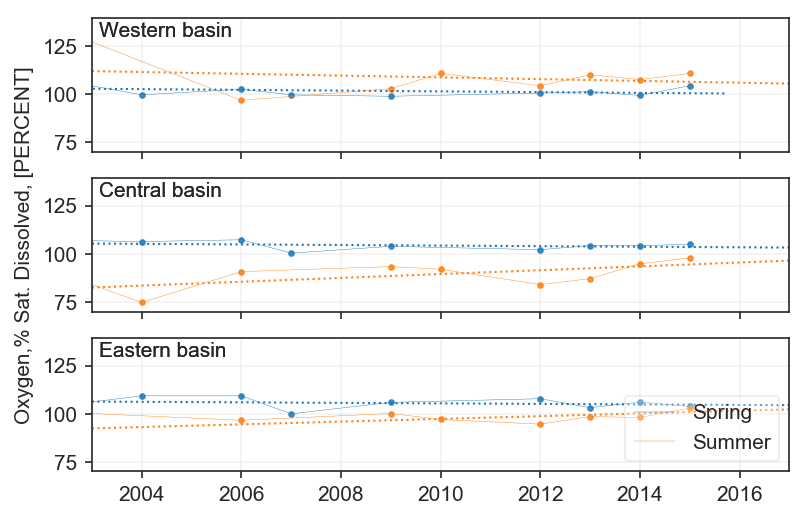

In [142]:
for elem in combined_elements:
    f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
    a=[]
    limits=[]
    for i, b in enumerate(['Western', 'Central', 'Eastern']):
        for s in seasons:
            d1 = ECCCmeas[(ECCCmeas['BASIN']==b) & (ECCCmeas['SEASON']==s) & (ECCCmeas.ABBREV.isin(elem))]
            d1 = d1[d1.VALUE>0]
            data = d1.groupby(['YEAR','SEASON']).mean().reset_index()
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[1]
            sns.regplot(x=data.YEAR, y=data.VALUE, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
            ax, = axes[i].plot(data.YEAR, data.VALUE, c=clr, lw=0.2)
            ax.set_label(s)
            a.append(ax)
            axes[i].set_xlim(2003,2017)
            axes[i].grid(lw=0.2)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
            axes[i].text(0.01,0.86, b+' basin', fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
    axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
    
    low = [a.get_ylim()[0] for a in axes]
    high = [a.get_ylim()[1] for a in axes]
    limits = (min(low),max(high))

    for i,ax in enumerate(axes):
        axes[i].set_ylim(limits)
        axes[i].set_ylim(limits)
        axes[i].set_ylim(limits)
    try:
        axes[1].set_ylabel(d1.FULL_NAME.values[0].title().strip()+', ['+ d1.UNITS.values[0].strip() +']')
        f.savefig('Mass Balance/GLENDA/All Stations/ECCC Trends/'+d1.FULL_NAME.values[0].title().strip()+'.pdf')
    except:
        print(elem)

In [105]:
data

,BASIN,YEAR,SEASON,FULL_NAME,ABBREV,CRUISE_PLAN,CSN,LATITUDE_DD,LONGITUDE_DD,PSN,SOUNDING,CODE,DEPTH_FROM,DEPTH_TO,DETECTION,SEQ_NO,VALUE,MONTH


In [96]:
ECCCmeas_grouped.columns

Index(['BASIN', 'YEAR', 'SEASON', 'FULL_NAME', 'ABBREV', 'CRUISE_PLAN', 'CSN',
       'LATITUDE_DD', 'LONGITUDE_DD', 'PSN', 'SOUNDING', 'CODE', 'DEPTH_FROM',
       'DEPTH_TO', 'DETECTION', 'SEQ_NO', 'VALUE', 'MONTH'],
      dtype='object')

In [ ]:
f, axes = plt.subplots(3,1, figsize=(6,4), dpi=150, sharex=True)
a = []
for i, st in enumerate(deep_stations[::-1]):
    for k, s in enumerate(seasons):
        data = Clr[(Clr['STATION_ID']==st) & (Clr['SEASON']==s)]
        if s=='Spring':
            clr=sns.color_palette().as_hex()[0]
        if s=='Summer':
            clr=sns.color_palette().as_hex()[2]
        sns.regplot(x=data.YEAR, y=data.VALUE_1, lowess=True, color=clr, ax=axes[i], label='',ci=None,scatter_kws={'s':5}, line_kws={'lw':1,'ls':':','label':''})
        ax, = axes[i].plot(data.YEAR, data.VALUE_1, c=clr, lw=0.2)
        ax.set_label(s)
        a.append(ax)
#         axes[i].set_xlim(1990,2017)
        axes[i].grid(lw=0.2)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].text(0.01,0.86, ": ".join([basins[::-1][i], st]), fontsize=10, horizontalalignment='left', transform=axes[i].transAxes)
axes[2].legend(seasons, handles=[a[0],a[1]] , loc=4, framealpha=0.3)
axes[1].set_ylabel('Chloride, [$mg$ $L^{-1}$]')
